# Qualitative EDA

This notebook is designed to be run from top to bottom. It shows the distribution of comments per theme, labels per comment, words per comment, characters per comment and the most common words, n-grams and acronyms. 

## Instructions for Use

This notebook is designed to be run from the project root. To change the default working directory to the project root run the code chunk below only once. 

This notebook depends on 3 different files:
- qual_combined_train
    - generated by running make_qual_dataset.py 
    - make_qual_dataset is not part of our makefiles and needs to be run before using this notebook
    - from this EDA we were able to determine the 2015 and 2018 dataset were not compatible to combine for the classification task
- train_2018-qualitative-data
    - generated by running split_qual_data.py 
    - present in MakefileModel
- desensitized_qualitative-data2018
    - generated by running sensitive_text.py 
    - present in MakefileModel & MakefileLinking

#### Change working directory to project root

In [1]:
import os
# check what folder is the current working directory
print("Intial Working Directory \n", os.getcwd())
# change the working directory to one level up
os.chdir('../')
# confirm working directory is now project root
print("Current Working Directory \n", os.getcwd())

Intial Working Directory 
 C:\Users\payla\Documents\MDS\Capstone\DSCI_591_capstone-BCStats\notebooks
Current Working Directory 
 C:\Users\payla\Documents\MDS\Capstone\DSCI_591_capstone-BCStats


In [2]:
# import packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# import local packages
import src
from src.analysis.text_summary import *
from src.data.EDA_text import *

#### Load data sets

In [16]:
# read in the csv file with 2015 and 2018 data
qual_combined_train = pd.read_csv("data/interim/qual_combined_train.csv",
    index_col=0)
# read in the csv file with 2018 training data
df_2018 = pd.read_csv("data/interim/train_2018-qualitative-data.csv",
    index_col=0)
# read in the csv file with all 2018 data
df = pd.read_csv("data/interim/desensitized_qualitative-data2018.csv",
    index_col=0)
# read in the csv file with all 2018 data, slightly different format then above
data_full = pd.read_csv(".\data\interim\desensitized_qualitative-data2018.csv",
                            usecols=[0, 1, 2, 3, 4, 5, 6], 
                            names=["USERID", "text", "code1", "code2", "code3", "code4", "code5"], skiprows=1)
# cparse texts from data full
corpus_all_str = src.analysis.text_summary.generate_corpus_from_comments(data_full, sentences=False)
corpus_all = src.analysis.text_summary.generate_corpus_from_comments(data_full)


# get the list of selected main themes
categories = list(qual_combined_train.columns.values)
categories = categories[1:]
#print(categories)

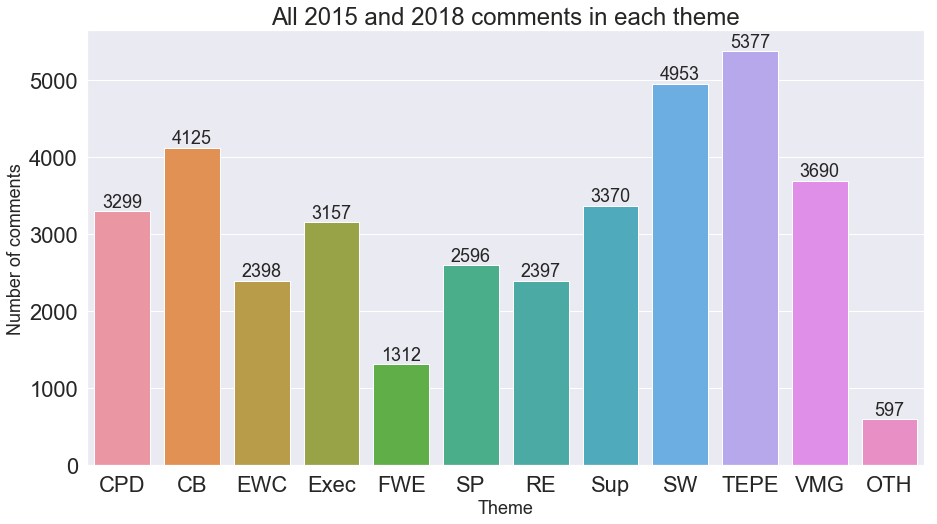

In [4]:
###################################################################################
#Visualtion of comment counts in each theme including 2015 and 2018 total comments#
###################################################################################

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(categories, qual_combined_train.iloc[:,1:].sum().values)

plt.title("All 2015 and 2018 comments in each theme", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Theme', fontsize=18)

#adding the text labels
rects = ax.patches
labels = qual_combined_train.iloc[:,1:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center',
    va='bottom', fontsize=18)

plt.show()

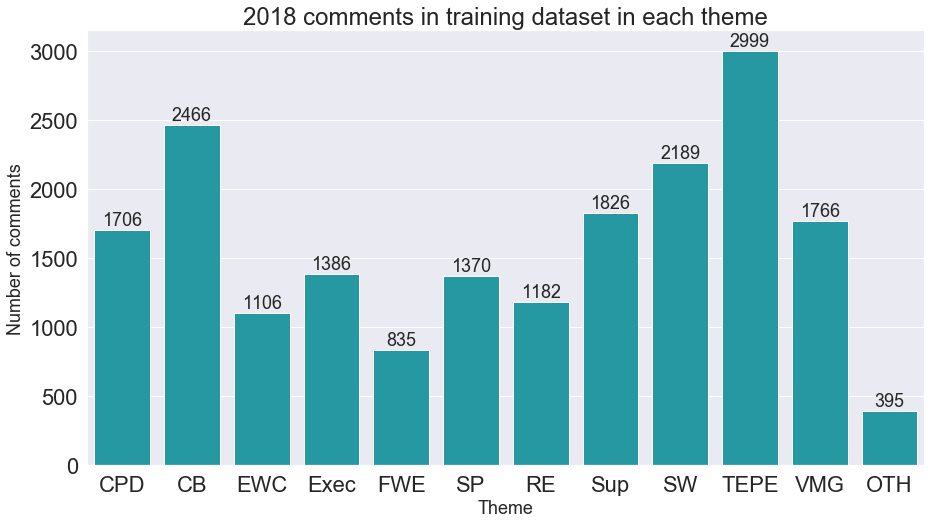

In [5]:
##################################################################################
#Visualtion of comment counts in each theme including 2018 trianing comments only#
##################################################################################
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(categories, df_2018.iloc[:,6:18].sum().values, color="#12AAB5")

plt.title("2018 comments in training dataset in each theme", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Theme', fontsize=18)

#adding the text labels
rects = ax.patches
labels = df_2018.iloc[:,6:18].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center',
    va='bottom', fontsize=18)

plt.show()

1    16037
2     5389
3     1839
4      737
5      281
0       87
6       72
7       17
9        3
8        1
dtype: int64


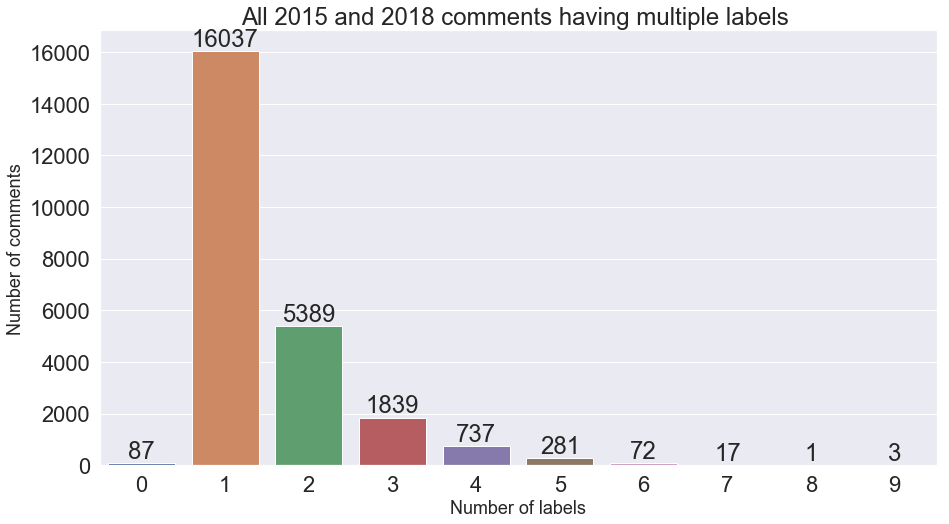

In [6]:

################################################################################
# Visualtion of numbers of comments having multiple labels in 2015 and 2018    #
################################################################################

# Calculating number of comments having multiple labels
rowSums = qual_combined_train.iloc[:,1:].sum(axis=1)
#print(rowSums)
multiLabel_counts = rowSums.value_counts()
print(multiLabel_counts)
multiLabel_counts = multiLabel_counts.sort_index()

# visualtion of numbers of comments having multiple labels
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("All 2015 and 2018 comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center',
    va='bottom')

plt.show()


1    9025
2    2787
3     968
4     337
0      86
5      75
dtype: int64


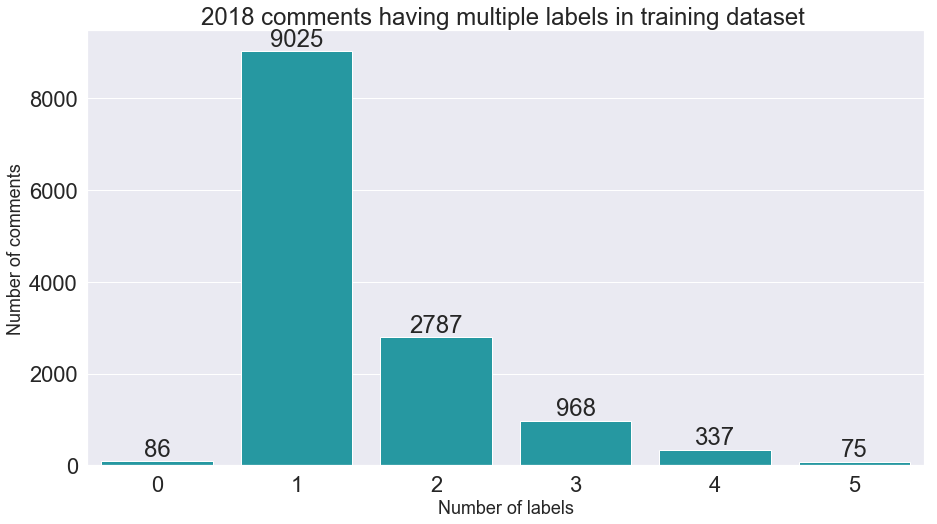

In [12]:

########################################################################################
# Visualtion of numbers of comments having multiple labels including 2018 training data#
########################################################################################

# Calculating number of comments having multiple labels
rowSums = df_2018.iloc[:,6:18].sum(axis=1)
#print(rowSums)
multiLabel_counts = rowSums.value_counts()
print(multiLabel_counts)
multiLabel_counts = multiLabel_counts.sort_index()

# visualtion of numbers of comments having multiple labels
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values, color="#12AAB5" )

plt.title("2018 comments having multiple labels in training dataset ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center',
    va='bottom')

plt.show()


1    10008
2     3100
3     1087
4      378
0       99
5       81
dtype: int64


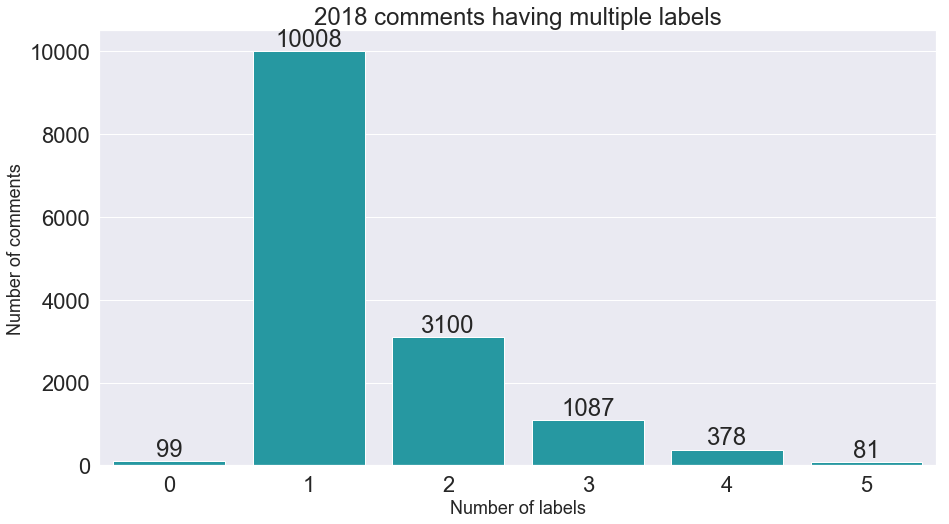

In [15]:

########################################################################################
# Visualtion of numbers of comments having multiple labels including all 2018 data#
########################################################################################

# Calculating number of comments having multiple labels
rowSums = df.iloc[:,6:18].sum(axis=1)
#print(rowSums)
multiLabel_counts = rowSums.value_counts()
print(multiLabel_counts)
multiLabel_counts = multiLabel_counts.sort_index()

# visualtion of numbers of comments having multiple labels
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values, color="#12AAB5" )

plt.title("2018 comments having multiple labels")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center',
    va='bottom')

plt.show()


### Sentence EDA

In [ ]:
sentence_eda(corpus_all, word_plot=True, character_plot=True)

### Word Frequency

#### Single Words

In [ ]:
top_words = word_frequency(corpus_all, max_features=200, min_df=10, ngram_range=(1,1))
top_words.head(10)

In [ ]:
src.data.EDA_text.generate_WordCloud(corpus_all_str, height=700, width=600)

#### n-grams

In [10]:
top_n_grams = word_frequency(corpus_all, max_features=200, min_df=10, ngram_range=(2,4))
top_n_grams.head(10)

,words,counts
194,work unit,628
178,work environment,622
129,public service,576
180,work home,298
8,bc public,271
182,work life,262
75,life balance,252
183,work life balance,242
9,bc public service,237
24,cost living,222


In [ ]:
src.data.EDA_text.generate_WordCloud(corpus_all_str, collocations=True)

#### Acronyms

In [17]:
caps = re.findall(r'([A-Z]+\s?[A-Z]+[^a-z0-9\W])', corpus_all_str)
acronyms = src.data.EDA_text.word_frequency(caps, max_features=200, min_df=10)
acronyms.head(10)

,words,counts
0,adm,188
45,lws,150
46,mcfd,143
53,psa,132
70,wes,91
36,icm,74
30,fte,64
17,cymh,61
22,eaw,58
50,pay,44
